In [1]:
import os
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import json
from tqdm import tqdm
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

In [2]:
sns.set(rc={'figure.figsize':(10, 7)})

In [3]:
def read_data(tp='foreign'):
#     total = {}
#     for el in os.listdir(f'probs/{tp}'):
#         name = el.split('.')[0]
#         if name not in total:
#             total[name] = {}
#         with open(f'probs/{tp}/{el}', encoding='utf-8') as f:
#             total[name] = json.load(f)
    with open(f'probs/{tp}/total.json', encoding='utf-8') as f:
        total = json.load(f)
    return total

In [4]:
data = read_data(tp='rus')

In [5]:
with open('probs/order1.txt', encoding='utf-8') as f:
    order = f.read().splitlines()

In [6]:
def get_heatmap(data, key, x, order, keys=None, func=np.mean):
    small_data = {}
    for el in order:
        if el in data:
            small_data[el] = {}
            for el1 in order:
                if el1 in data[el]:
                    if keys or 'mean' in key:
                        if key == 'mean_all':
                            keys = ['width', 'width_no', 'depth', 'depth_no', 'size', 'size_no', 'sl', 'sl_no']
                        elif key == 'mean_no':
                            keys = ['width_no', 'depth_no', 'size_no', 'sl_no']
                        elif key == 'mean_yes':
                            keys = ['width', 'depth', 'size', 'sl']
                        small_data[el][el1] = func([data[el][el1][i][x] for i in keys])
                    else:
                        small_data[el][el1] = data[el][el1][key][x]
    df = pd.DataFrame(small_data).transpose().fillna(0)
    sns.heatmap(df, cmap='terrain')

In [7]:
n = 1

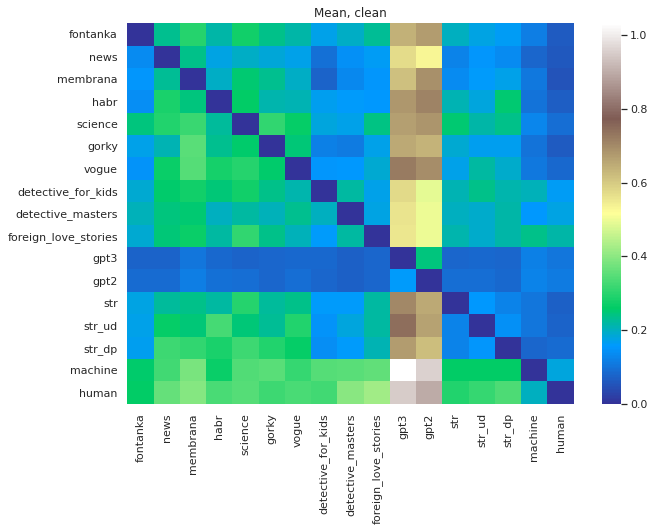

In [17]:
plt.title('Mean, clean')
get_heatmap(data, 'mean_no', n, order)

/home/tokubetsu/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:308: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


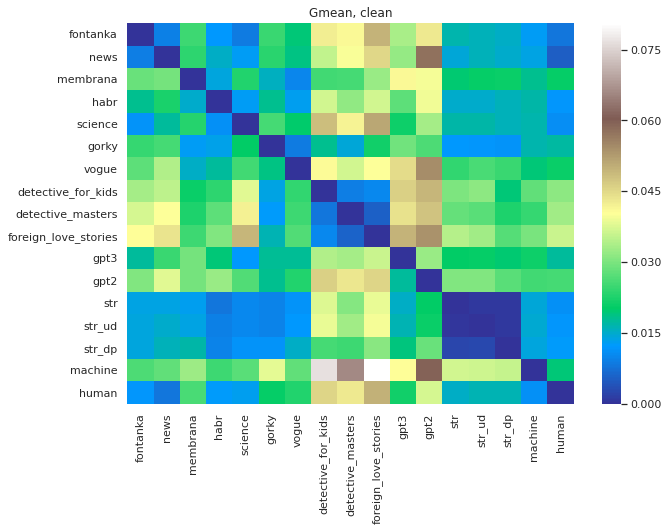

In [18]:
plt.title('Gmean, clean')
get_heatmap(data, 'mean_no', 1, order, func=stats.gmean)

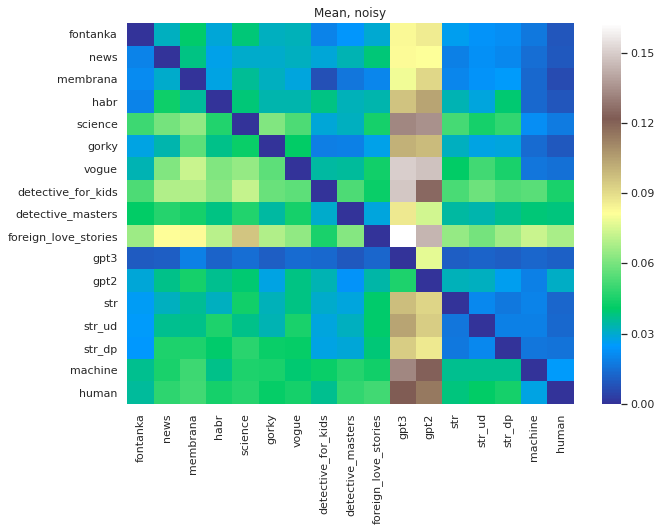

In [19]:
plt.title('Mean, noisy')
get_heatmap(data, 'mean_yes', n, order)

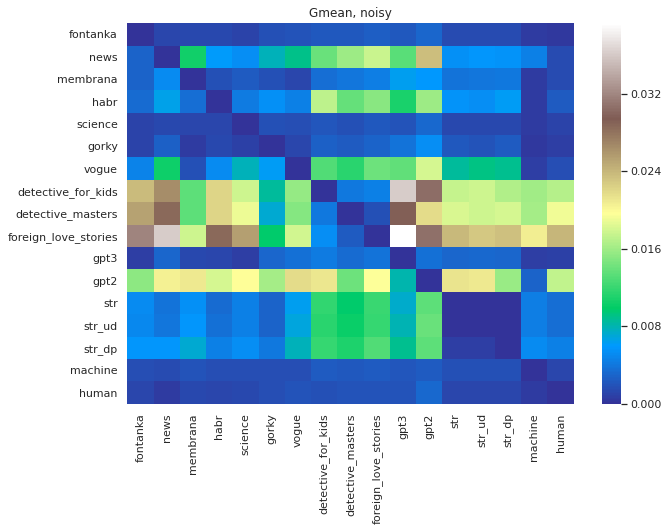

In [20]:
plt.title('Gmean, noisy')
get_heatmap(data, 'mean_yes', n, order, func=stats.gmean)

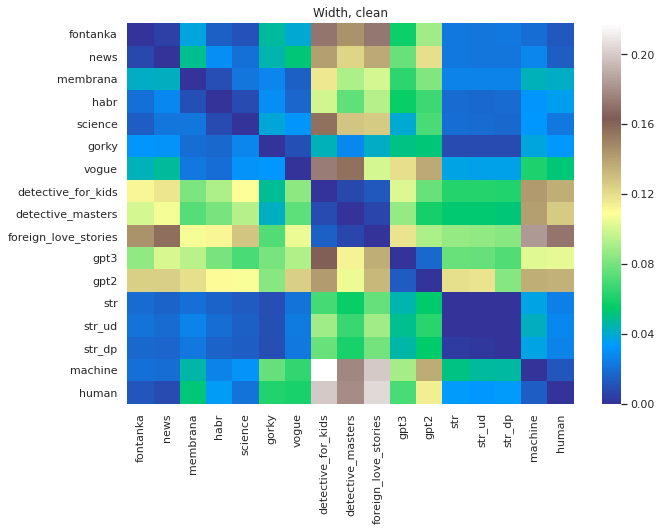

In [21]:
plt.title('Width, clean')
get_heatmap(data, 'width_no', n, order)

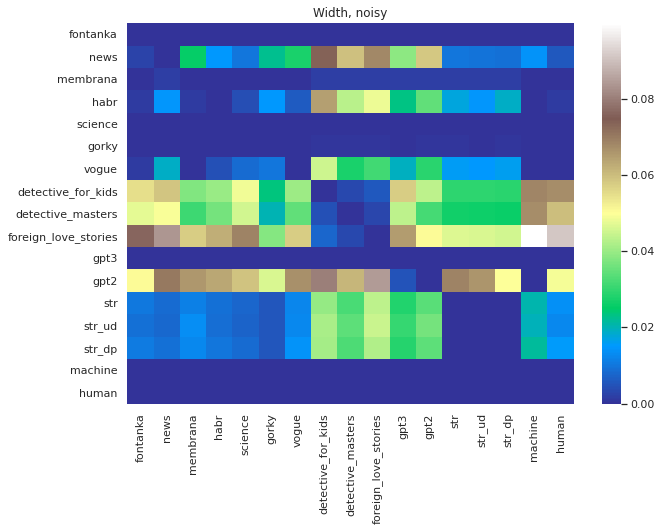

In [22]:
plt.title('Width, noisy')
get_heatmap(data, 'width', n, order)

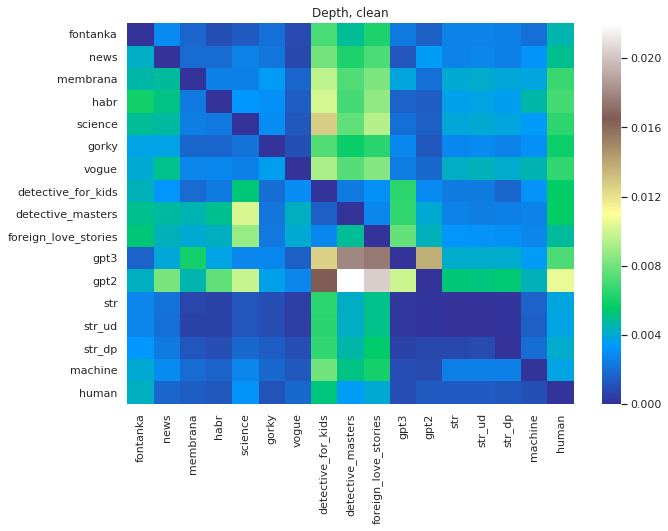

In [23]:
plt.title('Depth, clean')
get_heatmap(data, 'depth_no', 1, order)

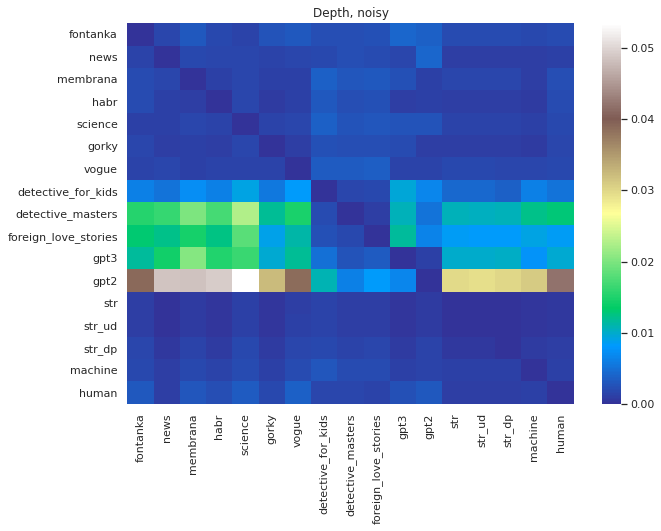

In [24]:
plt.title('Depth, noisy')
get_heatmap(data, 'depth', n, order)

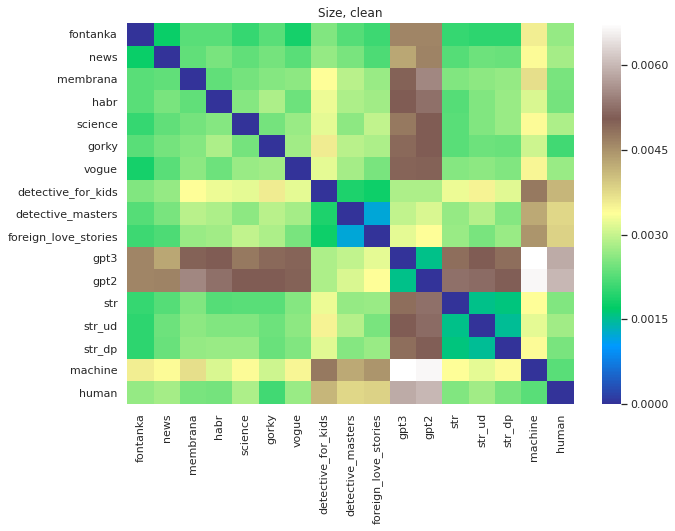

In [10]:
plt.title('Size, clean')
get_heatmap(data, 'size_no', 0, order)

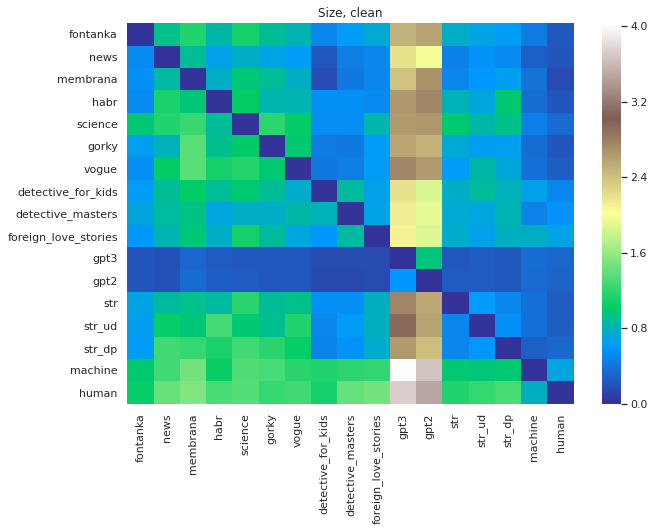

In [25]:
plt.title('Size, clean')
get_heatmap(data, 'size_no', n, order)

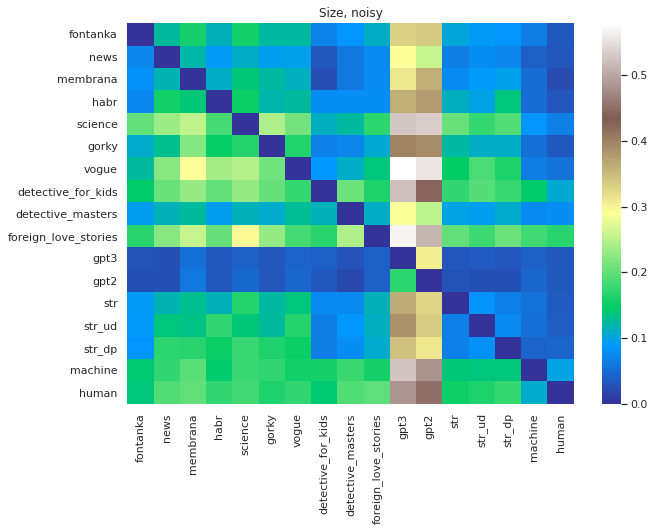

In [26]:
plt.title('Size, noisy')
get_heatmap(data, 'size', n, order)

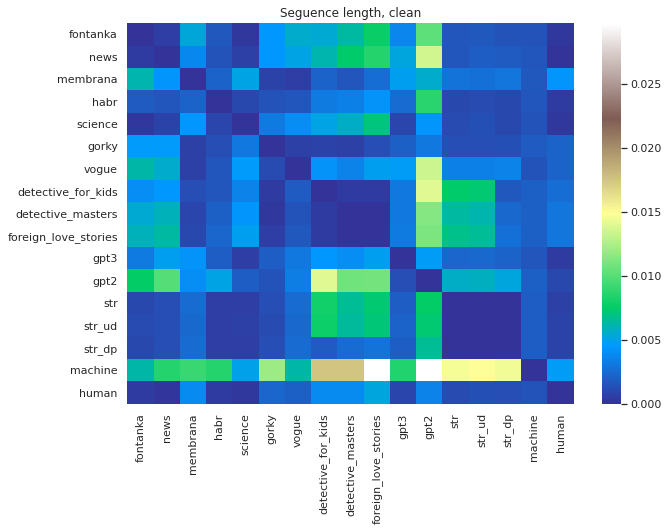

In [27]:
plt.title('Seguence length, clean')
get_heatmap(data, 'sl_no', n, order)

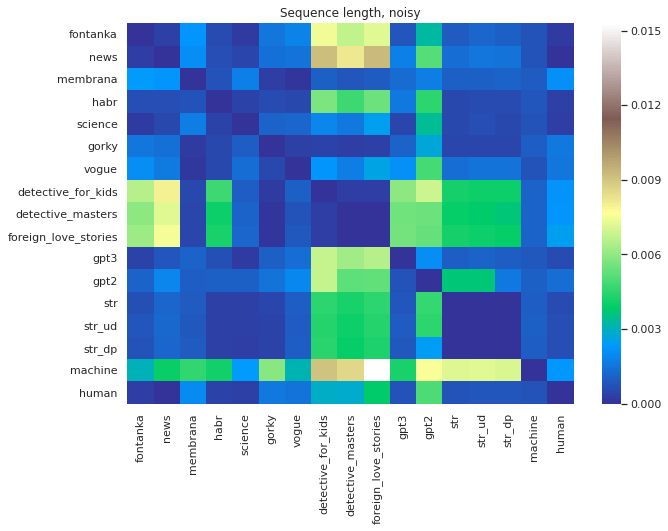

In [28]:
plt.title('Sequence length, noisy')
get_heatmap(data, 'sl', n, order)